# Analisa Mental Health

## Import Library dan Dataset

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# mengimpor dataset
data_ori = pd.read_csv('survey.csv')

# mencadangkan data
data = data_ori

## Exploratory Data Analysis

In [3]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data.isnull()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1257,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [7]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

## Data Preprocessing 

In [8]:
# menghapus kolom yang tidak diperlukan
data.drop(columns=['Country', 'state', 'Timestamp','comments'], inplace=True, axis = 1)
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [9]:
#melakukan pengubahan data dari text ke angka supaya mudah dianalisa oleh komputer
data['self_employed'] = data['self_employed'].map({'Yes':1, 'No':0})
data['family_history'] = data['family_history'].map({'Yes':1,'No':0})
data['treatment'] = data['treatment'].map({'Yes':1 ,'No':0})
data['work_interfere'] = data['work_interfere'].map(  {'Never':0.00 ,'Rarely':0.33,'Not Sometimes':0.66,'Often':1.00} )
data['tech_company'] = data['tech_company'].map(  {'Yes':1 ,'No':0} )
data['benefits'] = data['benefits'].map(  {'Yes':1 ,'No':0,'Don\'t know':0.5} )
data['care_options'] = data['care_options'].map(  {'Yes':1 ,'No':0,'Not sure':0.5} )
data['wellness_program'] = data['wellness_program'].map(  {'Yes':1 ,'No':0,'Don\'t know':0.5} )
data['seek_help'] = data['seek_help'].map(  {'Yes':1 ,'No':0,'Don\'t know':0.5} )
data['anonymity'] = data['anonymity'].map(  {'Yes':1 ,'No':0,'Don\'t know':0.5} )
data['leave'] = data['leave'].map(  {'Very easy':1 ,'Somewhat easy':0.75,'Very difficult':0,'Somewhat difficult':0.25,'Don\'t know' :0.5 } ) 
data['mental_health_consequence'] = data['mental_health_consequence'].map(  {'Yes':1 ,'No':0,'Maybe':0.5} )
data['phys_health_consequence'] = data['phys_health_consequence'].map(  {'Yes':1 ,'No':0,'Maybe':0.5} )
data['coworkers'] = data['coworkers'].map(  {'Yes':1 ,'No':0,'Some of them':0.5} )
data['supervisor'] = data['supervisor'].map(  {'Yes':1 ,'No':0,'Some of them':0.5} )
data['mental_health_interview'] = data['mental_health_interview'].map(  {'Yes':1 ,'No':0,'Maybe':0.5} )
data['phys_health_interview'] = data['phys_health_interview'].map(  {'Yes':1 ,'No':0,'Maybe':0.5} )
data['mental_vs_physical'] = data['mental_vs_physical'].map(  {'Yes':1 ,'No':0,'Don\'t know':0.5} )
data['obs_consequence'] = data['obs_consequence'].map(  {'Yes':1 ,'No':0} )
data['remote_work'] = data['remote_work'].map({'Yes':1, 'No':0})

In [10]:
# memperbaiki data gender
gender = data['Gender'].str.lower()

gender = data['Gender'].unique()

# mengelompokkan data gender
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)


stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male' 'trans']


In [11]:
# menambahkan kolom Age_range untuk mengelompokan data umur berdasarkan kolom Age

# memperbaiki nilai umur yang salah
data['Age'].fillna(data['Age'].median(), inplace=True)

# mengisi dengan nilai median dengan nilai < 18 dan > 120
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s

# mengelompokkan umur
data['Age_range'] = pd.cut(data['Age'], 
                           [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                           labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"],
                           include_lowest=True
)

C:\Users\VIVOBOOK ULTRA\AppData\Local\Temp\ipykernel_2176\1794213059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\VIVOBOOK ULTRA\AppData\Local\Temp\ipykernel_2176\1794213059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = s
C:\Users\VIVOBOOK ULTRA\AppData\Local\Temp\ipykernel_2176\1794213059.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
# mengisi data kosong pada kolom self_employed
se_mean = data['self_employed'].mean()

if se_mean < 0.5:
    data['self_employed'].fillna(0.00, inplace=True)
else:
    data['self_employed'].fillna(1.00, inplace=True)
    
data['self_employed'].isnull().sum()

C:\Users\VIVOBOOK ULTRA\AppData\Local\Temp\ipykernel_2176\4057570840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['self_employed'].fillna(0.00, inplace=True)


0

In [14]:
# mengisi data kosong pada kolom work_interfere
wi_mean = data['work_interfere'].mean()

if wi_mean <= 0.165:
    data['work_interfere'].fillna(0.00, inplace=True)
if wi_mean > 0.165 and wi_mean <= 0.495:
    data['work_interfere'].fillna(0.33, inplace=True)
if wi_mean > 0.495 and wi_mean <= 0.825:
    data['work_interfere'].fillna(0.66, inplace=True)
if wi_mean > 0.825:
    data['work_interfere'].fillna(1.00, inplace=True)

data['work_interfere'].isnull().sum()

C:\Users\VIVOBOOK ULTRA\AppData\Local\Temp\ipykernel_2176\3705961922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['work_interfere'].fillna(0.33, inplace=True)


0

In [15]:
# cek missing value
data.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age_range                    0
dtype: int64

In [16]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,37,female,0.0,0,1,1.00,6-25,0,1,1.0,...,0.75,0.0,0.0,0.5,1.0,0.0,0.5,1.0,0,31-40
1,44,male,0.0,0,0,0.33,More than 1000,0,0,0.5,...,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0,41-50
2,32,male,0.0,0,0,0.33,6-25,0,1,0.0,...,0.25,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,31-40
3,31,male,0.0,1,1,1.00,26-100,0,1,0.0,...,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.0,1,31-40
4,31,male,0.0,0,0,0.00,100-500,1,1,1.0,...,0.50,0.0,0.0,0.5,1.0,1.0,1.0,0.5,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,0.0,0,1,0.33,26-100,0,1,0.0,...,0.75,0.0,0.0,0.5,0.5,0.0,0.0,0.5,0,21-30
1255,32,male,0.0,1,1,1.00,26-100,1,1,1.0,...,0.25,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0,31-40
1256,34,male,0.0,1,1,0.33,More than 1000,0,1,1.0,...,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,31-40
1257,46,female,0.0,0,0,0.33,100-500,1,1,0.0,...,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50


In [17]:
# mencadangkan data yang sudah melalui tahap preprocessing
data_processed = data

## Korelasi 

In [18]:
#melihat korelasi data
data.corr()

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.072407,0.009407,0.073455,-0.033544,0.146096,-0.057569,0.113718,0.107980,0.106699,...,0.041974,-0.046389,0.067718,0.094443,-0.007133,0.009511,-0.036027,-0.060454,-0.028265,0.070909
self_employed,0.072407,1.000000,0.004437,0.016264,0.063371,0.312281,0.078562,-0.267441,0.042626,-0.020919,...,0.040540,-0.016741,-0.065040,0.027932,0.069544,0.032966,0.079088,0.029561,0.121782,0.072052
family_history,0.009407,0.004437,1.000000,0.376714,0.186807,0.011448,-0.047080,0.132881,0.105618,0.026579,...,0.021068,-0.036142,0.095067,0.054599,-0.004154,0.001608,-0.067386,-0.043960,-0.062916,0.120771
treatment,0.073455,0.016264,0.376714,1.000000,0.355654,0.024593,-0.032295,0.138083,0.235135,0.050237,...,0.096019,-0.088548,0.130005,0.047231,0.066022,-0.037944,-0.054694,0.003491,-0.063784,0.154008
work_interfere,-0.033544,0.063371,0.186807,0.355654,1.000000,0.046158,-0.037100,-0.028102,0.073927,-0.054764,...,0.004638,-0.084072,0.110545,0.005247,0.021368,-0.011581,-0.027183,0.064403,-0.082428,0.128554
remote_work,0.146096,0.312281,0.011448,0.024593,0.046158,1.000000,0.130228,-0.102232,0.007152,-0.046785,...,0.001165,0.017941,-0.012390,0.017755,0.078716,0.022677,0.078854,0.030174,0.079678,-0.045254
tech_company,-0.057569,0.078562,-0.047080,-0.032295,-0.037100,0.130228,1.000000,-0.087540,-0.027933,-0.117664,...,-0.019735,0.054493,-0.115810,-0.048640,0.074318,0.048796,0.082559,0.001707,0.118315,-0.064468
benefits,0.113718,-0.267441,0.132881,0.138083,-0.028102,-0.102232,-0.087540,1.000000,0.296614,0.407399,...,0.244965,0.126125,-0.038995,-0.074320,0.014096,0.041809,-0.040074,-0.100279,0.099004,-0.040422
care_options,0.107980,0.042626,0.105618,0.235135,0.073927,0.007152,-0.027933,0.296614,1.000000,0.287277,...,0.302237,0.049255,-0.027884,-0.001073,0.027132,0.080303,0.004944,-0.036532,0.051297,0.069383
wellness_program,0.106699,-0.020919,0.026579,0.050237,-0.054764,-0.046785,-0.117664,0.407399,0.287277,1.000000,...,0.266616,0.149195,-0.123803,-0.036114,0.070508,0.122032,0.002828,-0.052937,0.242643,0.034837


<AxesSubplot:>

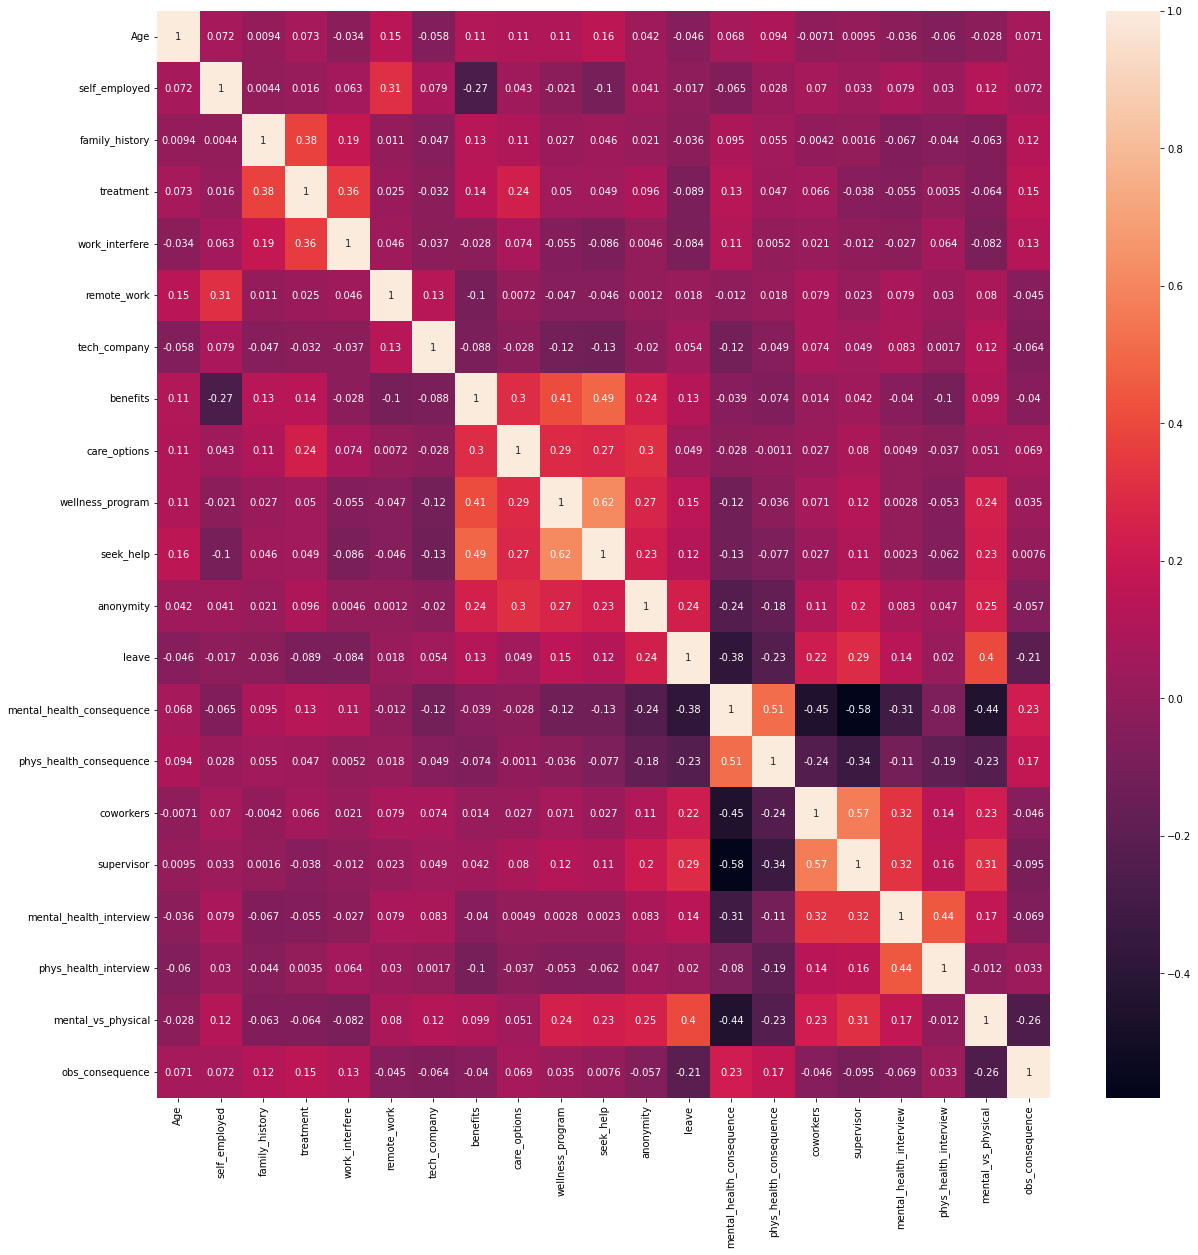

In [19]:
# melihat korelasi data menggunakan heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

In [20]:
# Exploratory Data Analysis menggunakan pandas-profiling
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Logistic Regresi

In [21]:
# one hot encoding untuk memecah data ke kolom yang berbeda
data = pd.get_dummies(data)
data

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,no_employees_More than 1000,Age_range_0-20,Age_range_21-30,Age_range_31-40,Age_range_41-50,Age_range_51-60,Age_range_61-70,Age_range_71-80,Age_range_81-90,Age_range_91-100
0,37,0.0,0,1,1.00,0,1,1.0,0.5,0.0,...,0,0,0,1,0,0,0,0,0,0
1,44,0.0,0,0,0.33,0,0,0.5,0.0,0.5,...,1,0,0,0,1,0,0,0,0,0
2,32,0.0,0,0,0.33,0,1,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,31,0.0,1,1,1.00,0,1,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,31,0.0,0,0,0.00,1,1,1.0,0.0,0.5,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0.0,0,1,0.33,0,1,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1255,32,0.0,1,1,1.00,1,1,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1256,34,0.0,1,1,0.33,0,1,1.0,1.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1257,46,0.0,0,0,0.33,1,1,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
# menampilkan info data setelah dilakukan one hot encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1257 non-null   int64  
 1   self_employed                1257 non-null   float64
 2   family_history               1257 non-null   int64  
 3   treatment                    1257 non-null   int64  
 4   work_interfere               1257 non-null   float64
 5   remote_work                  1257 non-null   int64  
 6   tech_company                 1257 non-null   int64  
 7   benefits                     1257 non-null   float64
 8   care_options                 1257 non-null   float64
 9   wellness_program             1257 non-null   float64
 10  seek_help                    1257 non-null   float64
 11  anonymity                    1257 non-null   float64
 12  leave                        1257 non-null   float64
 13  mental_health_cons

In [23]:
# membagi data menjadi x dan y

# mengelompokkan beberapa kolom ke satu variabel
predictions = [
    'Age',
    'self_employed',
    'work_interfere',
    'anonymity',
    'leave',
    'coworkers',
    'supervisor',
    'Gender_female', 'Gender_male', 'Gender_trans',
    'no_employees_1-5', 'no_employees_100-500', 'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25', 'no_employees_More than 1000'
]

X = data[predictions] # memasukkan variabel yang sudah berisi kolom-kolom ke variabel X
y = data['treatment'] # memasukkan data pada kolom treatment ke kolom y

In [24]:
# membuat scaler menggunakan Standard Scaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data

,Age,self_employed,work_interfere,anonymity,leave,coworkers,supervisor,Gender_female,Gender_male,Gender_trans,no_employees_1-5,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000
0,0.678065,-0.359694,2.479460,1.405807,0.658762,0.047539,1.070813,2.022145,-1.930172,-0.123884,-0.381906,-0.403500,-0.546401,-0.223887,1.826057,-0.537802
1,1.641148,-0.359694,-0.075384,-0.456258,-0.256226,-1.567505,-1.298926,-0.494524,0.518089,-0.123884,-0.381906,-0.403500,-0.546401,-0.223887,-0.547628,1.859421
2,-0.009851,-0.359694,-0.075384,-0.456258,-1.171213,1.662583,1.070813,-0.494524,0.518089,-0.123884,-0.381906,-0.403500,-0.546401,-0.223887,1.826057,-0.537802
3,-0.147434,-0.359694,2.479460,-2.318323,-1.171213,0.047539,-1.298926,-0.494524,0.518089,-0.123884,-0.381906,-0.403500,1.830159,-0.223887,-0.547628,-0.537802
4,-0.147434,-0.359694,-1.333740,-0.456258,-0.256226,0.047539,1.070813,-0.494524,0.518089,-0.123884,-0.381906,2.478315,-0.546401,-0.223887,-0.547628,-0.537802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,-0.835350,-0.359694,-0.075384,-0.456258,0.658762,0.047539,-0.114057,-0.494524,0.518089,-0.123884,-0.381906,-0.403500,1.830159,-0.223887,-0.547628,-0.537802
1253,-0.009851,-0.359694,2.479460,1.405807,-1.171213,0.047539,1.070813,-0.494524,0.518089,-0.123884,-0.381906,-0.403500,1.830159,-0.223887,-0.547628,-0.537802
1254,0.265316,-0.359694,-0.075384,-0.456258,-1.171213,-1.567505,-1.298926,-0.494524,0.518089,-0.123884,-0.381906,-0.403500,-0.546401,-0.223887,-0.547628,1.859421
1255,1.916314,-0.359694,-0.075384,-0.456258,-0.256226,-1.567505,-1.298926,2.022145,-1.930172,-0.123884,-0.381906,2.478315,-0.546401,-0.223887,-0.547628,-0.537802


In [25]:
# membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data,
    y,
    test_size=0.2,
    random_state=1
)

In [26]:
# membuat model menggunakan Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train) # melatih model menggunakan fungsi fit

model.score(X_test, y_test) # menampilkan score akurasi model

0.7103174603174603

## Visualisasi

In [27]:
# mengimpor data pada saat preprocessing
data = data_processed

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wellness_program'>

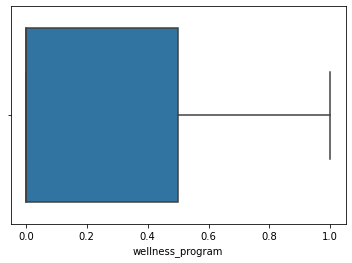

In [28]:
sns.boxplot(data['wellness_program'])

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seek_help'>

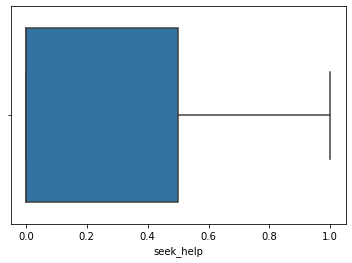

In [29]:
sns.boxplot(data['seek_help'])

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mental_health_consequence'>

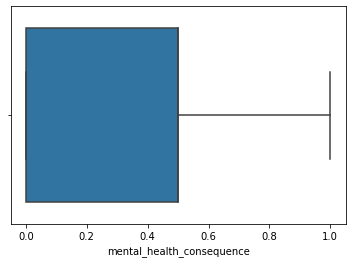

In [30]:
sns.boxplot(data['mental_health_consequence'])

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phys_health_consequence'>

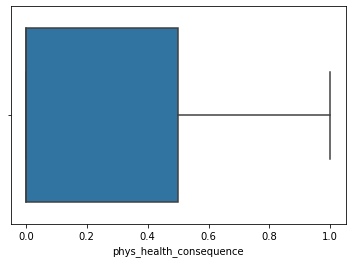

In [31]:
sns.boxplot(data['phys_health_consequence'])

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coworkers'>

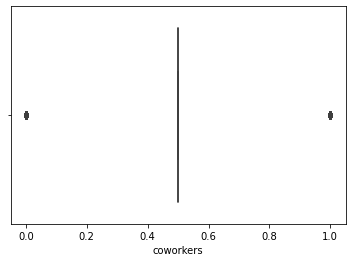

In [32]:
sns.boxplot(data['coworkers'])

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='supervisor'>

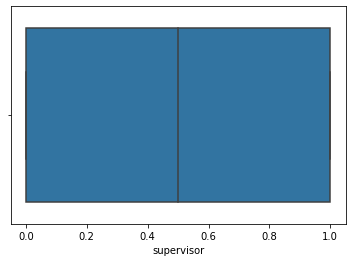

In [33]:
sns.boxplot(data['supervisor'])

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

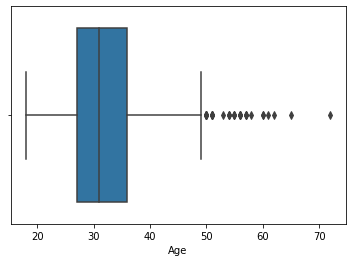

In [34]:
sns.boxplot(data['Age'])

<function matplotlib.pyplot.show(close=None, block=None)>

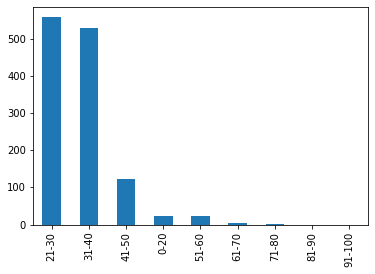

In [36]:
# menampilkan jumlah data pada kolom Age_range
Age_range_counts = data['Age_range'].value_counts()

Age_range_counts.plot(kind='bar')
plt.show

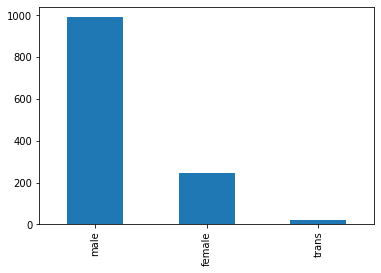

In [37]:
# menampilkan jumlah data pada kolom Gender
Gender_counts = data['Gender'].value_counts()

Gender_counts.plot(kind='bar')
plt.show()

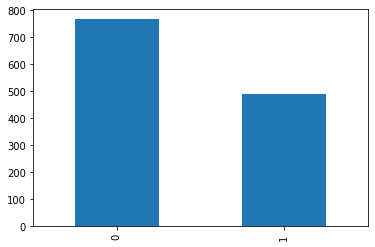

In [38]:
# menampilkan jumlah data pada kolom family history
family_history_counts = data['family_history'].value_counts()

family_history_counts.plot(kind='bar')
plt.show()

In [39]:
# Encoding data
labelDict = {}
for feature in data:
    le = LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

C:\Users\VIVOBOOK ULTRA\AppData\Local\Temp\ipykernel_2176\1412034263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = le.transform(data[feature])


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_self_employed [0.0, 1.0]
label_family_history [0, 1]
label_treatment [0, 1]
label_work_interfere [0.0, 0.33, 1.0]
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work [0, 1]
label_tech_company [0, 1]
label_benefits [0.0, 0.5, 1.0]
label_care_options [0.0, 0.5, 1.0]
label_wellness_program [0.0, 0.5, 1.0]
label_seek_help [0.0, 0.5, 1.0]
label_anonymity [0.0, 0.5, 1.0]
label_leave [0.0, 0.25, 0.5, 0.75, 1.0]
label_mental_health_consequence [0.0, 0.5, 1.0]
label_phys_health_consequence [0.0, 0.5, 1.0]
label_coworkers [0.0, 0.5, 1.0]
label_supervisor [0.0, 0.5, 1.0]
label_mental_health_interview [0.0, 0.5, 1.0]
label_phys_health_interview [0.0, 0.5, 1.0]
label_mental_vs_physical [0.0, 0.5, 1.0]
label_obs_co

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


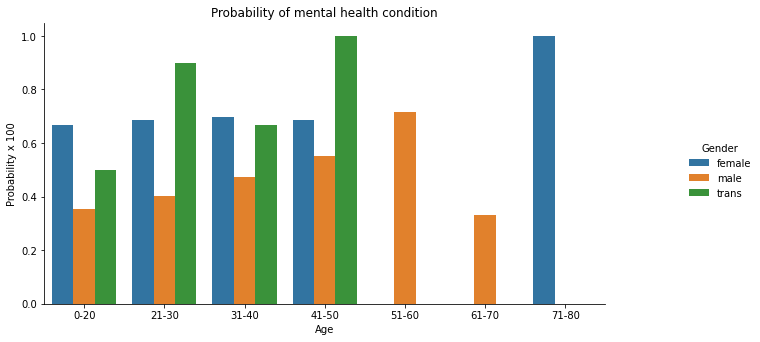

In [40]:
# membuat diagram batang untuk menampilkan probabilitas pada kolom Age beserta keterangan gender
o = labelDict['label_Age_range']

g = sns.factorplot(x="Age_range", y="treatment", hue="Gender", data=data, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\vivobook ultra\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


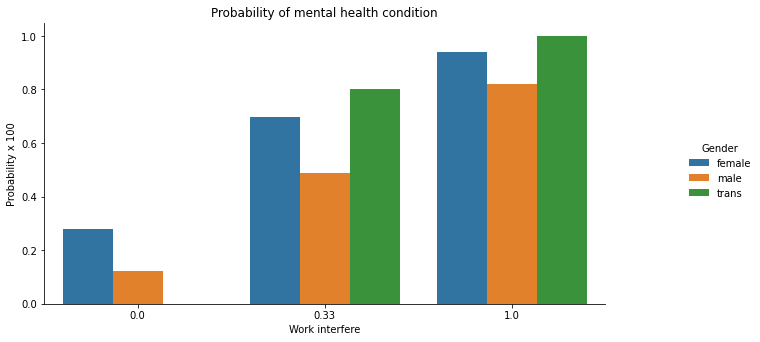

In [41]:
# membuat diagram batang untuk menampilkan probabilitas pada kolom Work Interfere beserta keterangan gender
o = labelDict['label_work_interfere']
g = sns.factorplot(
    x='work_interfere',
    y='treatment',
    hue='Gender',
    data=data,
    kind='bar',
    ci=None,
    size=5,
    aspect=2,
    legend_out=True
)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()